<a href="https://colab.research.google.com/github/Itallo0708/Computational-Mathematics/blob/main/Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1 - Aplicação de Transformações Lineares.
Primeiramente, vamos importar as bibliotecas necessárias e criar funções para exibirmos os gráficos.

Bibliotecas:

In [3]:

import matplotlib.pyplot as plt
import numpy as np

Função para plotar gráficos:

In [39]:
def plotar_vetores(vetores, cores=None, titulo="vetores"):
  plt.figure(figsize=(6,6))

  if cores is None:
    cores = ['r', 'b', 'g', 'm', 'c', 'y', 'k']

  for i, vetor in enumerate(vetores):
    plt.quiver(0,0,
               vetor[0], vetor[1],
               angles ='xy',
               scale_units ='xy',
               scale = 1,
               color = cores[i % len(cores)])

    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.xticks(np.arange(-15, 16, 1))
    plt.yticks(np.arange(-15,16,1))
    plt.axhline(0, color = 'black', linewidth = 0.5)
    plt.axvline(0, color = 'black', linewidth = 0.5)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(titulo)
    plt.show

# 1.1.1 Aplicando rotação em 90 graus seguido de Shear
Partindo dos vetores v1= [2, 1] e v2 = [1, 3] de $\mathbb{R}^2$

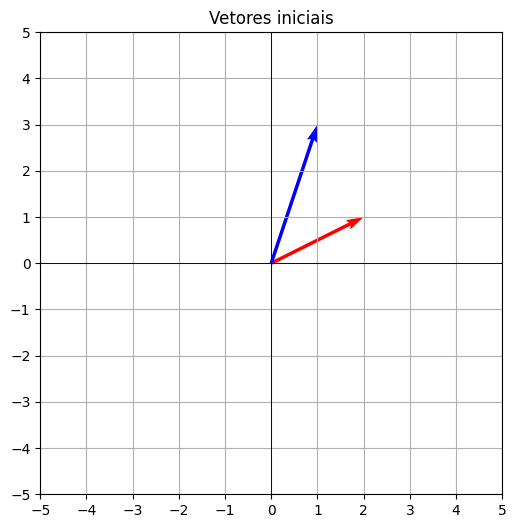

In [7]:
vetores =  np.array([[2,1], [1,3]])
plotar_vetores(vetores, None, 'Vetores iniciais')

E como vimos anteriormente a matriz de rotação em 90° é:
$$
Mr = \begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}
$$
Aplicando nos vetores v1 e v2 temos a seguinte operação:
$$
R A =
\begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}
\begin{pmatrix}
2 & 1 \\
1 & 3
\end{pmatrix}
=
\begin{pmatrix}
1 & 3 \\
-2 & -1
\end{pmatrix}
$$

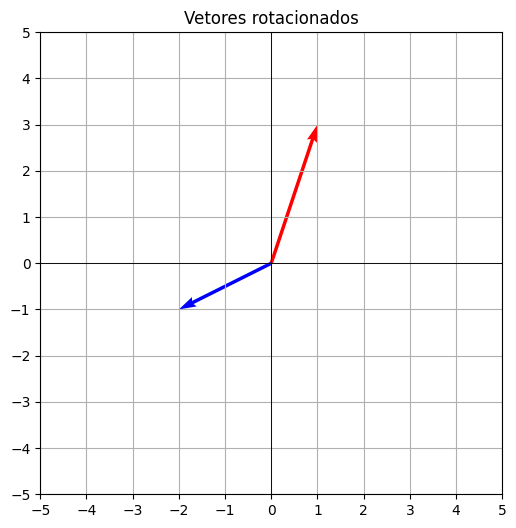

In [8]:
matriz_R90 = np.array([[0, 1], [-1, 0]])
vetores_rotacionados = matriz_R90 @ vetores

plotar_vetores(vetores_rotacionados, None, 'Vetores rotacionados')

Além disso, na atividade anterior definimos o  shear em x com K = 4 como:
$$
Sx = \begin{pmatrix}
1 & 4 \\
0 & 1
\end{pmatrix}
$$
Aplicando nos vetores v1_rotacionado e v2_rotacionado temos a seguinte operação:
$$
S Rv =
\begin{pmatrix}
1 & 4 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 & 3 \\
-2 & -1
\end{pmatrix}
=
\begin{pmatrix}
-7 & -1 \\
-2 & -1
\end{pmatrix}
$$

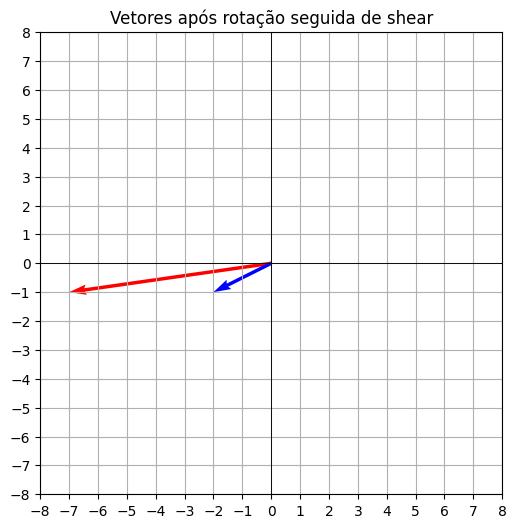

In [30]:
shear_x_matriz = np.array([[1,4], [0,1]])
rotationed_sheared_x_vetor = shear_x_matriz @ vetores_rotacionados

plotar_vetores(rotationed_sheared_x_vetor, None, 'Vetores após rotação seguida de shear')

# 1.1.2 Procedimento 2
$$
R =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix},
\quad
S_x =
\begin{bmatrix}
1 & 4\\
0 & 1
\end{bmatrix}
$$

$$
S_xR =
\begin{bmatrix}
1 & 4\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
=
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
$$

$$
\begin{bmatrix}
a \\
c
\end{bmatrix}
=
\begin{bmatrix}
1 & 4\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
=
0
\begin{bmatrix}
1 \\
0
\end{bmatrix}
+
(-1)
\begin{bmatrix}
4 \\
1
\end{bmatrix}
=
\begin{bmatrix}
-4 \\
-1
\end{bmatrix}
$$

$$
\begin{bmatrix}
b \\
d
\end{bmatrix}
=
\begin{bmatrix}
1 & 4\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
1
\begin{bmatrix}
1 \\
0
\end{bmatrix}
+
0
\begin{bmatrix}
4 \\
1
\end{bmatrix}
=
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

$$
S_xR =
\begin{bmatrix}
-4 & 1\\
-1 & 0
\end{bmatrix}
$$

In [24]:
#Função de multiplicação matricial conforme o procedimento 2
def multiplicacao_combinacao_linear(Matriz_A, Matriz_B):
  colunas_resultado = []

  for coluna_B in Matriz_B.T:
    vetor_resultante = np.zeros(Matriz_A.shape[0])

    for i, coluna_A in enumerate(Matriz_A.T):
      escalar = coluna_B[i]
      vetor_multiplicado = coluna_A * escalar
      vetor_resultante = vetor_resultante + vetor_multiplicado

    colunas_resultado.append(vetor_resultante)

  return np.array(colunas_resultado).T


In [26]:
matriz_rotacao_shear_x = multiplicacao_combinacao_linear(shear_x_matriz, matriz_R90)
print(f'Matriz Shear em X: {shear_x_matriz}\n')
print(f'Matriz rotação: {matriz_R90}\n')
print(f'Matriz rotação após Shear em X: {matriz_rotacao_shear_x}\n')

Matriz Shear em X: [[1 4]
 [0 1]]

Matriz Shear: [[ 0  1]
 [-1  0]]

Matriz Shear em X: [[-4.  1.]
 [-1.  0.]]



Aplicando o procedimento nos vetores v1 e v2, temos:

In [27]:
vetores_rotacionados_seguidos_shear_x = multiplicacao_combinacao_linear(matriz_rotacao_shear_x, vetores)
print(f'Matriz rotação após Shear em X: {matriz_rotacao_shear_x}\n')
print(f'Matriz de vetores: {vetores}\n')
print(f'Matriz resultante: {vetores_rotacionados_seguidos_shear_x}\n')

Matriz rotação após Shear em X: [[-4.  1.]
 [-1.  0.]]

Matriz de vetores: [[2 1]
 [1 3]]

Matriz resultante: [[-7. -1.]
 [-2. -1.]]



Graficamente temos:

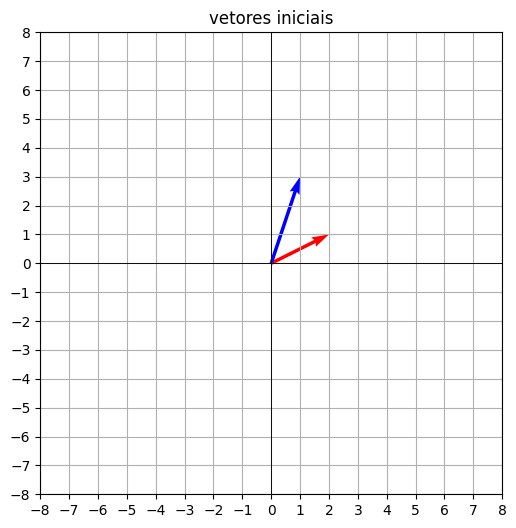

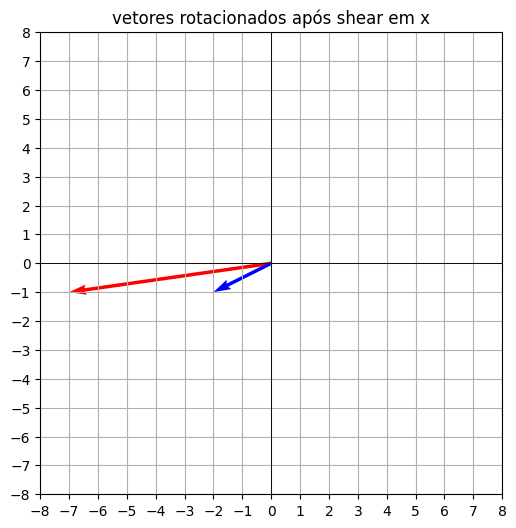

In [29]:
plotar_vetores(vetores, None, 'vetores iniciais')
plotar_vetores(vetores_rotacionados_seguidos_shear_x, None, 'vetores rotacionados após shear em x')

# 2.0 Determinante
Comparando o determinante antes e depois das transformações:


O determinante antes das transformações é: 5.00


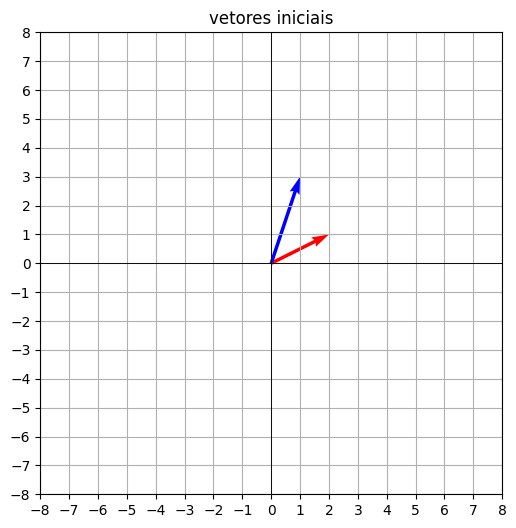

In [35]:
plotar_vetores(vetores, None, 'vetores iniciais')
det = np.linalg.det(vetores)
print(f"O determinante antes das transformações é: {det:.2f}")

O determinante após as transformações é: 5.00


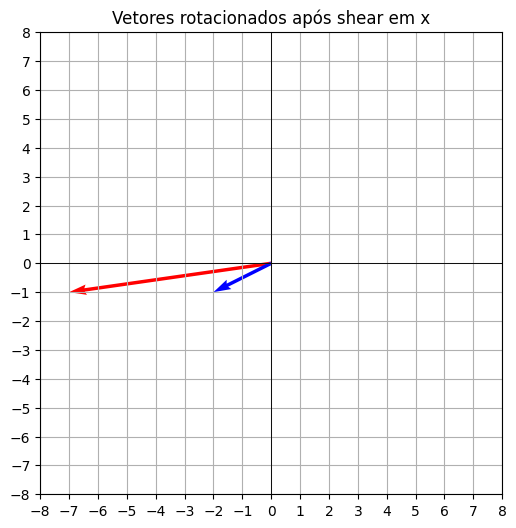

In [36]:
plotar_vetores(rotationed_sheared_x_vetor, None, 'Vetores rotacionados após shear em x')
det_f = np.linalg.det(rotationed_sheared_x_vetor)
print(f"O determinante após as transformações é: {det_f:.2f}")

Concluímos que as transformações preservam o determinante e por consequência a área do paralelograma demarcado pelos vetores permanece inalterada.

# 3. Aplicação do Shear em X + Rotação em 90º
# 3.1 Procedimento 1
Partindo dos vetores v1= [2, 1] e v2 = [1, 3] de $\mathbb{R}^2$

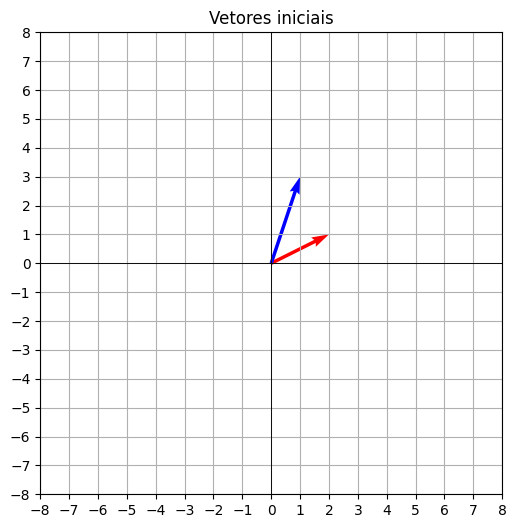

In [37]:
vetores =  np.array([[2,1], [1,3]])
plotar_vetores(vetores, None, 'Vetores iniciais')

Anteriormente definimos o  shear em x com K = 4 como:
$$
Sx = \begin{pmatrix}
1 & 4 \\
0 & 1
\end{pmatrix}
$$
Aplicando nos vetores v1 e v2 temos a seguinte operação:
$$
S v =
\begin{pmatrix}
1 & 4 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
2 & 1 \\
1 & 3
\end{pmatrix}
=
\begin{pmatrix}
 6 & 13 \\
 1 & 3
\end{pmatrix}
$$

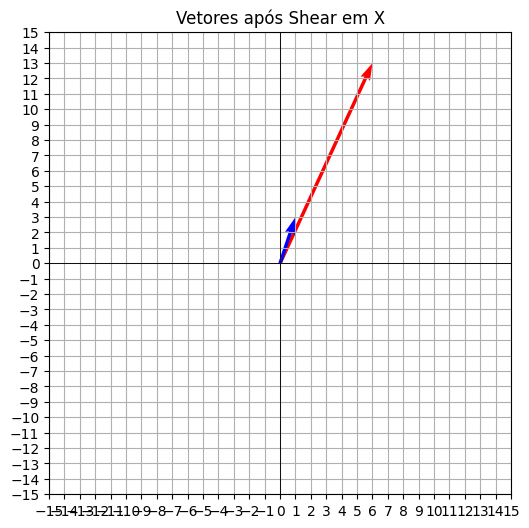

In [40]:
Sv = shear_x_matriz @ vetores
plotar_vetores(Sv, None, 'Vetores após Shear em X')


E como vimos anteriormente a matriz de rotação em 90° é:
$$
Mr = \begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}
$$
Aplicando nos vetores v1_shear_x e v2_shear_x temos a seguinte operação:
$$
R S =
\begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}
\begin{pmatrix}
6 & 13 \\
1 & 3
\end{pmatrix}
=
\begin{pmatrix}
1 & 3 \\
-6 & -13
\end{pmatrix}
$$

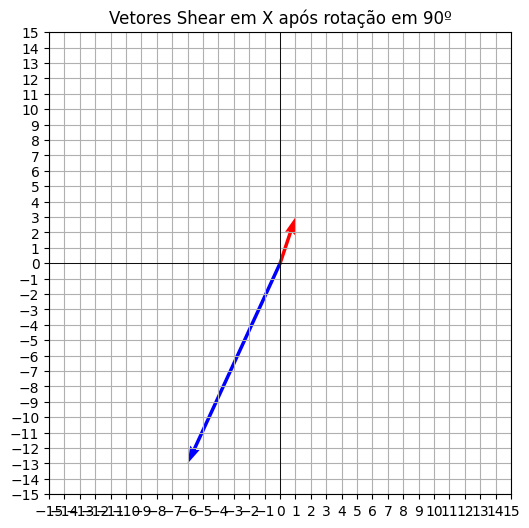

In [41]:
vetores_rotacionados_2 = matriz_R90 @ Sv
plotar_vetores(vetores_rotacionados_2, None, 'Vetores Shear em X após rotação em 90º')


# 3.2 Procedimento 2
$$
S_x =
\begin{bmatrix}
1 & 4\\
0 & 1
\end{bmatrix},
\quad
R =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
$$

$$
RS_x =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\begin{bmatrix}
1 & 4\\
0 & 1
\end{bmatrix}
=
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
$$

$$
\begin{bmatrix}
a \\
c
\end{bmatrix}
=
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
1
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
+
0
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
$$

$$
\begin{bmatrix}
b \\
d
\end{bmatrix}
=
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\begin{bmatrix}
4 \\
1
\end{bmatrix}
=
4
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
+
1
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
\begin{bmatrix}
0 \\
-4
\end{bmatrix}
+
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
\begin{bmatrix}
1 \\
-4
\end{bmatrix}
$$

$$
RS_x =
\begin{bmatrix}
0 & 1\\
-1 & -4
\end{bmatrix}
$$

In [42]:
matriz_shear_rotacao = multiplicacao_combinacao_linear(matriz_R90, shear_x_matriz)
print(f"A matriz de rotação em 90º é: {matriz_R90} \n")
print(f"A matriz de shear em x é: {shear_x_matriz} \n")
print(f"A matriz de rotação em 90º após shear é: {matriz_shear_rotacao} \n")

A matriz de rotação em 90º é: [[ 0  1]
 [-1  0]] 

A matriz de shear em x é: [[1 4]
 [0 1]] 

A matriz de rotação em 90º após shear é: [[ 0.  1.]
 [-1. -4.]] 



Aplicando a Matriz nos vetores temos:

In [43]:
vetores_shear_rotacao = multiplicacao_combinacao_linear(matriz_shear_rotacao, vetores)
print(f"A matriz de rotação em 90º após shear é: {matriz_shear_rotacao} \n")
print(f"A matriz de vetores é: {vetores} \n")
print(f"A matriz de vetores após shear + rotação em 90º: {vetores_shear_rotacao} \n")

A matriz de rotação em 90º após shear é: [[ 0.  1.]
 [-1. -4.]] 

A matriz de vetores é: [[2 1]
 [1 3]] 

A matriz de vetores após shear + rotação em 90º: [[  1.   3.]
 [ -6. -13.]] 



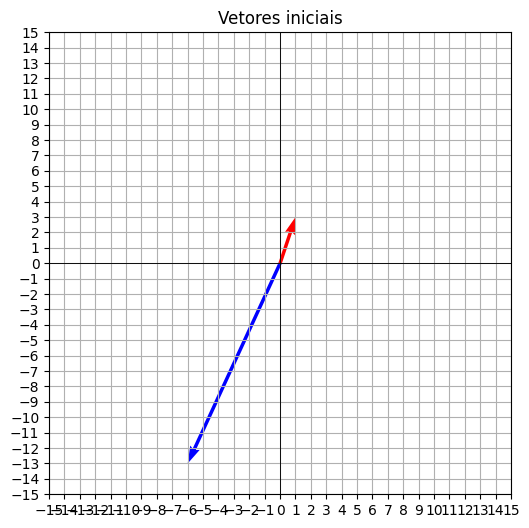

In [47]:
plotar_vetores(vetores_shear_rotacao, None, 'Vetores iniciais')

# 3.3 Determinante

O determinante antes das transformações é: 5.00


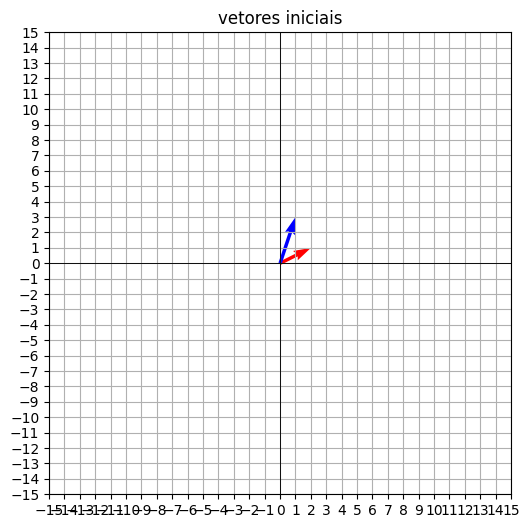

In [45]:
plotar_vetores(vetores, None, 'vetores iniciais')
det = np.linalg.det(vetores)
print(f"O determinante antes das transformações é: {det:.2f}")

O determinante antes das transformações é: 5.00


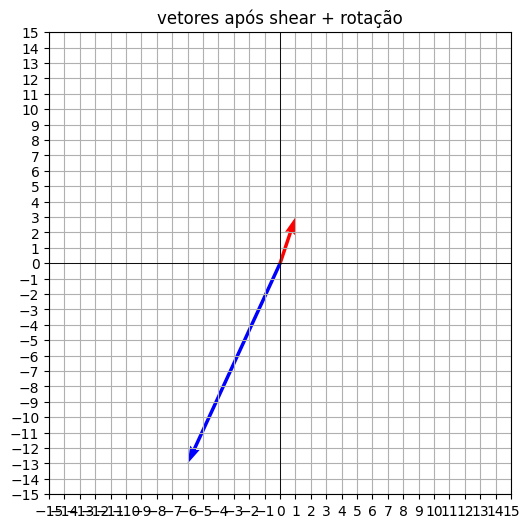

In [46]:
plotar_vetores(vetores_shear_rotacao, None, 'vetores após shear + rotação')
det = np.linalg.det(vetores_shear_rotacao)
print(f"O determinante antes das transformações é: {det:.2f}")

Concluímos que as transformações preservam o determinante e por consequência a área do paralelograma demarcado pelos vetores permanece inalterada.

# 4.0 Transformação Linear + Produto Escalar